
<div class="alert alert-danger">
<h2><strong>Library Imports</strong></h2>
</div>

In [552]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import squarify
from sklearn.preprocessing import StandardScaler, OneHotEncoder
%matplotlib inline

<div class="alert alert-danger">
<h2><strong>Custom Classes</strong></h2>
</div>

In [553]:
class CustomEDA:     
    """Custom Exploratory Data Analysis Class"""    
    
    def fn_nulls_count(self, df):
        """Function to count the null values and their percentages in each column."""
        # Nulls counts in each column.
        nulls_counts = df.isnull().sum()
        # Convert above series into dataframe.
        nulls_counts_df = nulls_counts.to_frame(name = 'nulls_count')
        # Add a new column - to get the null counts percentage to the total rows.
        nulls_counts_df['nulls_percentage'] = round(100 * nulls_counts_df['nulls_count']/df.shape[0], 2)
        # Return the null counts dataframe.
        return nulls_counts_df
    
    def fn_plot_residuals(self, df):
        """Function to plot residuals in data."""
        # retrieve data as numpy array
        values = df.values
        print(values.shape)
        # create a subplot for each time series
        plt.figure(figsize=(16, 16))
        for i in range(values.shape[1]):
            plt.subplot(values.shape[1], 1, i+1)
            plt.plot(values[:, i])
        plt.show()
    
    
    def fn_compute_outliers(self, df):
        """Function to check for outliers in data."""
        Q1 = df.quantile(0.25)
        Q3 = df.quantile(0.75)
        IQR = Q3 - Q1
        cleaned_eeg_df = df[~((df < (Q1 - 1.5 * IQR)) |
                                  (df > (Q3 + 1.5 * IQR)))\
                                .any(axis=1)]
        print(cleaned_eeg_df.shape)
        return cleaned_eeg_df
    
    
    def fn_plot_correlation(self, df):
        """Function to plot the correlation in data."""
        plt.figure(figsize=(12,7))
        sns.heatmap(df.corr(), annot=True)
        plt.xticks(rotation=45)
        plt.show()
    
    def fn_check_and_drop_duplicates(self, df):
        """Function to check and drop duplicates in data."""
        duplicate = df[df.duplicated()]  
        print("Duplicate Rows :")  
        #Print the resultant Dataframe 
        duplicate 
        df_duplicates_removed = pd.DataFrame.drop_duplicates(df)
        print(df_duplicates_removed)
        return df_duplicates_removed
       
    def fn_fetch_col_based_ontype(self, df, *args):
        """Function to return column based on column type"""
        return df.select_dtypes(include=args).columns.tolist()
    
    def fn_get_data_information(self, df):
        """Function to fetch data-frame information"""
        print(f'Shape of dataframe is {df.shape}')
        print('*************************************************************')
        print("DataFrame information")
        print(df.info())
        print('************************************************************')
        print("DataFrame Summary")
        print(df.describe())
        
    def fn_plot_pairplots(self, df, targetCol):
        for i in range(0, len(df.columns), 5):
                sns.pairplot(data=df,
                x_vars=df.columns[i:i+5],
                y_vars=[targetCol])
                
    def fn_plot_regplot(self, df, features_to_analyse, targetCol):
        fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 12))
        for i, ax in enumerate(fig.axes):
            if i < len(features_to_analyse) - 1:
                sns.regplot(x=features_to_analyse[i],y=targetCol, data=df[features_to_analyse], ax=ax)
                
    def fn_plot_countplot(self, df_not_num):
        fig, axes = plt.subplots(round(len(df_not_num.columns) / 3), 3, figsize=(12, 30))
        for i, ax in enumerate(fig.axes):
            if i < len(df_not_num.columns):
                ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
                sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)
        fig.tight_layout() 
    
    def fn_plot_histplot(self, df_num):
        df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);
        
    def fn_nulls_plot(self,df):
        plt.figure(figsize = (12,6))
        sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
        plt.xticks(rotation=45)
        plt.show()

<div class="alert alert-danger">
<h2><strong>View at the datasets</strong></h2>
</div>

In [554]:
data = pd.read_csv("./datasets/traindata_without_target.csv")
farm_data = pd.read_csv("./datasets/farm_data.csv")
weather_data = pd.read_csv("./datasets/train_weather.csv")

<div class="alert alert-danger">
<h3><strong>Train Dataset Analysis</strong></h3>
</div>

In [555]:
# Instantiating the custom class
eda = CustomEDA()

In [556]:
# Converting to Date-Time
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S')

In [557]:
#mem_train = train.memory_usage(index=True).sum()
mem_test=data.memory_usage(index=True).sum()
#print("train dataset uses ",mem_train/ 1024**2," MB")
print("Train dataset uses ",mem_test/ 1024**2," MB")
# checking contents in train
data.head()

Train dataset uses  462.7099304199219  MB


,date,farm_id,ingredient_type
0,2016-01-01,fid_110884,ing_w
1,2016-01-01,fid_90053,ing_w
2,2016-01-01,fid_17537,ing_w
3,2016-01-01,fid_110392,ing_w
4,2016-01-01,fid_62402,ing_w


In [558]:
#There are only 54 stores
#data['farm_id'] = data['farm_id'].astype(np.uint8)
print(data.memory_usage(index=True))
new_mem_test=data.memory_usage(index=True).sum()
print("Train dataset uses ",new_mem_test/ 1024**2," MB after changes")
print("memory saved =",(mem_test-new_mem_test)/ 1024**2," MB")

Index                    128
date               161728800
farm_id            161728800
ingredient_type    161728800
dtype: int64
Train dataset uses  462.7099304199219  MB after changes
memory saved = 0.0  MB


In [559]:
# Checking the dtypes
data.dtypes

date               datetime64[ns]
farm_id                    object
ingredient_type            object
dtype: object

In [560]:
pd.set_option('display.max_rows', None)

In [561]:
# Shape of data frame
print(f"Shape of Train Data - {data.shape}")
print("*"*30)
print(f"Shape of Farm Data - {farm_data.shape}")
print("*"*30)
print(f"Shape of Weather Data - {weather_data.shape}")

Shape of Train Data - (20216100, 3)
******************************
Shape of Farm Data - (1449, 6)
******************************
Shape of Weather Data - (139773, 9)


In [562]:
# Check the first few rows
data.head()

,date,farm_id,ingredient_type
0,2016-01-01,fid_110884,ing_w
1,2016-01-01,fid_90053,ing_w
2,2016-01-01,fid_17537,ing_w
3,2016-01-01,fid_110392,ing_w
4,2016-01-01,fid_62402,ing_w


In [563]:
# Check the last few rows
data.tail()

,date,farm_id,ingredient_type
20216095,2016-12-31 23:00:00,fid_41664,ing_w
20216096,2016-12-31 23:00:00,fid_14529,ing_w
20216097,2016-12-31 23:00:00,fid_46454,ing_w
20216098,2016-12-31 23:00:00,fid_24103,ing_w
20216099,2016-12-31 23:00:00,fid_34139,ing_w


In [564]:
# Check unique values
data.nunique()

date               8784
farm_id            1434
ingredient_type       4
dtype: int64

In [565]:
# Check the data-types
data.dtypes

date               datetime64[ns]
farm_id                    object
ingredient_type            object
dtype: object

In [566]:
# Verify the unique ingredient types
data['ingredient_type'].unique()

array(['ing_w', 'ing_z', 'ing_x', 'ing_y'], dtype=object)

<div class="alert alert-danger">
<h3><strong>Farm Data Analysis</strong></h3>
</div>

In [567]:
# Shape of the Farm Dataset
farm_data.shape

(1449, 6)

In [568]:
# View the first few rows in farm dataset
farm_data.head()

,farm_id,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location
0,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369
1,fid_90053,2004.0,NaN,252.696160,Obery Farms,location 7369
2,fid_17537,1991.0,NaN,499.446528,Obery Farms,location 7369
3,fid_110392,2002.0,NaN,2200.407555,Obery Farms,location 7369
4,fid_62402,1975.0,NaN,10833.140121,Obery Farms,location 7369


In [569]:
# Verify the last few rows in farm dataset
farm_data.tail()

,farm_id,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location
1444,fid_41664,1914.0,NaN,1822.663957,Sanderson Farms,location 5150
1445,fid_14529,NaN,NaN,399.297094,Obery Farms,location 5150
1446,fid_46454,1997.0,NaN,1046.552295,Sanderson Farms,location 5150
1447,fid_24103,2001.0,NaN,2766.186825,Dole Food Company,location 5150
1448,fid_34139,2001.0,NaN,8572.252713,Wayne Farms,location 5150


In [570]:
# Check the unique values
farm_data.nunique()

farm_id                       1434
operations_commencing_year     116
num_processing_plants           18
farm_area                     1397
farming_company                 16
deidentified_location           16
dtype: int64

In [571]:
# Check the data-types in farm dataset
farm_data.dtypes

farm_id                        object
operations_commencing_year    float64
num_processing_plants         float64
farm_area                     float64
farming_company                object
deidentified_location          object
dtype: object

In [572]:
farm_data.head()

,farm_id,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location
0,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369
1,fid_90053,2004.0,NaN,252.696160,Obery Farms,location 7369
2,fid_17537,1991.0,NaN,499.446528,Obery Farms,location 7369
3,fid_110392,2002.0,NaN,2200.407555,Obery Farms,location 7369
4,fid_62402,1975.0,NaN,10833.140121,Obery Farms,location 7369


In [573]:
# Check the no of nulls in farm dataset
eda.fn_nulls_count(farm_data)

,nulls_count,nulls_percentage
farm_id,0,0.00
operations_commencing_year,774,53.42
num_processing_plants,1094,75.50
farm_area,0,0.00
farming_company,0,0.00
deidentified_location,0,0.00


In [574]:
# Dropping the columns as more than 50 percent of them contain nulls. Hence they wont contribute muc to the evaluation
farm_data.drop(['num_processing_plants', 'operations_commencing_year'], axis=1,inplace=True)

In [575]:
farm_data.head()

,farm_id,farm_area,farming_company,deidentified_location
0,fid_110884,690.455096,Obery Farms,location 7369
1,fid_90053,252.696160,Obery Farms,location 7369
2,fid_17537,499.446528,Obery Farms,location 7369
3,fid_110392,2200.407555,Obery Farms,location 7369
4,fid_62402,10833.140121,Obery Farms,location 7369


In [576]:
# Dropping the duplicate rows in Farm dataset
farm_data.drop_duplicates(keep='first', inplace=True)

In [577]:
farm_data.shape

(1449, 4)

In [578]:
# Check the distribution in farm dataset
farm_data.describe()

,farm_area
count,1449.000000
mean,8557.460363
std,10290.860757
min,26.291549
25%,2137.883836
50%,5357.994719
75%,10746.647428
max,81290.125000


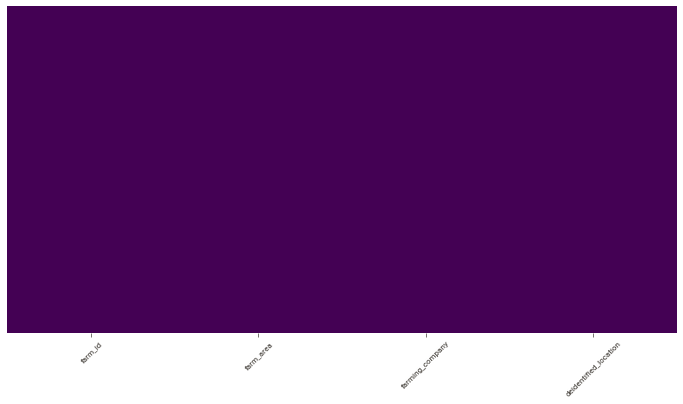

In [579]:
# Plot the nulls count in farm dataset
eda.fn_nulls_plot(farm_data)

<div class="alert alert-info">
<h4><strong><i>No null values present in the above plot</i></strong></h4>
</div>

In [580]:
plotly.offline.init_notebook_mode(connected=True)

<div class="alert alert-warning">
<h4><strong>Analysis of Farm Dataset through plots</strong></h4>
</div>

In [581]:
tmp = farm_data.groupby('deidentified_location')['farm_id'].count().reset_index()

fig = px.bar(tmp, y="farm_id", x="deidentified_location", text='farm_id', title="No of Farms across each Location")

fig.update_yaxes(title='Farm Count')

fig.update_xaxes(title='Location')

fig.show()

<div class="alert alert-info">
<h4><strong><i>From the above figure, we can say that Location 5290 has the highest number of Farms present and Location 868 has the lowest number of farms present</i></strong></h4>
</div>

In [582]:
tmp = farm_data.groupby(['farm_id','deidentified_location']).\
agg({'farm_area':'mean'}).reset_index().sort_values('farm_area', ascending=False)[:10]

fig = px.bar(tmp, y="farm_area", x="farm_id", text='farm_area', color='deidentified_location', title="Top 10 Farms having highest Farm Area")

fig.update_yaxes(title='Farm Area')

fig.update_xaxes(title='Farm Id')

fig.show()

<div class="alert alert-info">
<h4><strong><i>Above figure shows the Top 10 Farms having the highest area from highest to lowest. Farm Id 112803 has the highest farm area and belongs to Location with Id 5677</i></strong></h4>
</div>

In [583]:
tmp = farm_data.groupby(['farm_id','deidentified_location']).agg({'farm_area':'mean'}).reset_index().sort_values('farm_area', ascending=True)[:10]

fig = px.bar(tmp, y="farm_area", x="farm_id", text='farm_area', color='deidentified_location',title= "Farms having the lowest Farm-Area")

fig.update_yaxes(title='Farm Area')

fig.update_xaxes(title='Farm Id')

fig.show()

<div class="alert alert-info">
<h4><strong><i>Above figure shows the Top 10 Farms having the lowest area from lowest to highest. Farm Id 70417 has the lowest farm area and belongs to Location with Id 7369</i></strong></h4>
</div>

In [584]:
tmp = farm_data.groupby('deidentified_location').agg({'farm_area':'sum'}).reset_index()

fig = px.bar(tmp, y="farm_area", x="deidentified_location", text="farm_area", title="Total Farm Area across each Location")

fig.update_yaxes(title='Total Farm Area')
fig.update_xaxes(title='Location')

fig.show()

<div class="alert alert-info">
<h4><strong><i>Location 5290 has the highest Farm Area and Location 868 has the lowest Farm Area</i></strong></h4>
</div>

In [585]:
# Check the datatypes in Farm dataset
farm_data.dtypes

farm_id                   object
farm_area                float64
farming_company           object
deidentified_location     object
dtype: object

<div class="alert alert-danger">
<h3><strong>Weather Data Analysis</strong></h3>
</div>

In [586]:
# Check the first few rows in Weather Data
weather_data.head()

,timestamp,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2016-01-01 00:00:00,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
1,2016-01-01 01:00:00,location 7369,24.4,NaN,70.0,21.1,1020.2,-1.0,1.5
2,2016-01-01 02:00:00,location 7369,22.8,2.0,0.0,21.1,1020.2,0.0,0.0
3,2016-01-01 03:00:00,location 7369,21.1,2.0,0.0,20.6,1020.1,0.0,0.0
4,2016-01-01 04:00:00,location 7369,20.0,2.0,250.0,20.0,1020.0,-1.0,2.6


In [587]:
# Check the last few rows in Weather Data
weather_data.tail()

,timestamp,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
139768,2016-12-31 19:00:00,location 5150,3.0,NaN,180.0,-8.0,NaN,NaN,5.7
139769,2016-12-31 20:00:00,location 5150,2.8,2.0,180.0,-8.9,1007.4,NaN,7.7
139770,2016-12-31 21:00:00,location 5150,2.8,NaN,180.0,-7.2,1007.5,NaN,5.1
139771,2016-12-31 22:00:00,location 5150,2.2,NaN,170.0,-6.7,1008.0,NaN,4.6
139772,2016-12-31 23:00:00,location 5150,1.7,NaN,180.0,-5.6,1008.5,-1.0,8.8


In [588]:
# Check the unique rows in Weather Data
weather_data.nunique()

timestamp                8784
deidentified_location      16
temp_obs                  619
cloudiness                 10
wind_direction             43
dew_temp                  522
pressure_sea_level        709
precipitation             128
wind_speed                 58
dtype: int64

In [589]:
# Check the datatypes in Weather Data
weather_data.dtypes

timestamp                 object
deidentified_location     object
temp_obs                 float64
cloudiness               float64
wind_direction           float64
dew_temp                 float64
pressure_sea_level       float64
precipitation            float64
wind_speed               float64
dtype: object

In [590]:
# Covert the timestamp field to datetime in Weather dataset
weather_data['timestamp'] = pd.to_datetime(weather_data['timestamp'], format='%Y-%m-%d %H:%M:%S')
weather_data['timestamp'] = weather_data['timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')
weather_data['timestamp'] = pd.to_datetime(weather_data['timestamp'], format='%Y-%m-%d %H:%M:%S')

In [591]:
# Check the unique values of timestamp
weather_data['timestamp'].unique()

array(['2016-01-01T00:00:00.000000000', '2016-01-01T01:00:00.000000000',
       '2016-01-01T02:00:00.000000000', ...,
       '2016-12-31T21:00:00.000000000', '2016-12-31T22:00:00.000000000',
       '2016-12-31T23:00:00.000000000'], dtype='datetime64[ns]')

In [592]:
# Convert to Monthly format
weather_data['Month'] = weather_data['timestamp'].dt.month

In [593]:
# Drop the timestamp column
weather_data.drop('timestamp', axis=1, inplace=True)

In [594]:
weather_data.head()

,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,Month
0,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0,1
1,location 7369,24.4,NaN,70.0,21.1,1020.2,-1.0,1.5,1
2,location 7369,22.8,2.0,0.0,21.1,1020.2,0.0,0.0,1
3,location 7369,21.1,2.0,0.0,20.6,1020.1,0.0,0.0,1
4,location 7369,20.0,2.0,250.0,20.0,1020.0,-1.0,2.6,1


In [595]:
# Shape of the Weather dataset
weather_data.shape

(139773, 9)

In [596]:
# Columns of the weather dataset
weather_data.columns

Index(['deidentified_location', 'temp_obs', 'cloudiness', 'wind_direction',
       'dew_temp', 'pressure_sea_level', 'precipitation', 'wind_speed',
       'Month'],
      dtype='object')

In [597]:
# Aggregate by Month and take mean
df_weather = weather_data.groupby(['Month','deidentified_location'])\
.agg({'temp_obs':np.mean,'cloudiness':np.mean, 'dew_temp': np.mean, 'pressure_sea_level':np.mean, 'precipitation': np.mean, 'wind_speed':np.mean, 'wind_direction':np.mean})

df_weather.reset_index()


,Month,deidentified_location,temp_obs,cloudiness,dew_temp,pressure_sea_level,precipitation,wind_speed,wind_direction
0,1,location 1784,-2.833917,0.806540,-5.797174,1022.234306,0.638327,2.292463,161.831750
1,1,location 2532,-7.868414,2.849693,-11.459005,1017.842156,-0.032345,4.006317,215.362517
2,1,location 4525,-6.772157,NaN,-9.409489,1013.177372,3.896104,3.517784,198.349854
3,1,location 5150,-3.407251,0.926316,-7.855136,1013.955672,-0.098214,4.460968,207.657935
4,1,location 5290,1.625000,3.359918,-5.664247,1018.093535,0.780619,4.234812,214.021592
5,1,location 5410,-0.053028,0.760563,-7.467026,1015.872727,0.471063,3.421265,199.497283
6,1,location 5489,12.908602,2.144000,0.356855,1017.359085,0.362162,2.287903,117.636364
7,1,location 565,1.461777,0.730983,-7.206999,1017.530759,0.593540,2.428129,149.852290
8,1,location 5677,14.714305,3.667774,9.211336,1018.112466,1.796770,3.642876,196.702997
9,1,location 5833,11.554778,2.487500,7.588425,1018.809472,0.595136,3.252355,139.145183


In [598]:
df_weather.shape

(192, 7)

In [599]:
# Check the nulls
df_weather.isnull().sum()

temp_obs               0
cloudiness            24
dew_temp               0
pressure_sea_level    12
precipitation         36
wind_speed             0
wind_direction         0
dtype: int64

In [600]:
# Check the datatypes in the newly formed dataset
df_weather.dtypes

temp_obs              float64
cloudiness            float64
dew_temp              float64
pressure_sea_level    float64
precipitation         float64
wind_speed            float64
wind_direction        float64
dtype: object

In [601]:
# Verify the columns
df_weather.columns

Index(['temp_obs', 'cloudiness', 'dew_temp', 'pressure_sea_level',
       'precipitation', 'wind_speed', 'wind_direction'],
      dtype='object')

In [602]:
df_weather.reset_index(inplace=True)

In [603]:
df_weather.dtypes

Month                      int64
deidentified_location     object
temp_obs                 float64
cloudiness               float64
dew_temp                 float64
pressure_sea_level       float64
precipitation            float64
wind_speed               float64
wind_direction           float64
dtype: object

In [604]:
df_weather.head()

,Month,deidentified_location,temp_obs,cloudiness,dew_temp,pressure_sea_level,precipitation,wind_speed,wind_direction
0,1,location 1784,-2.833917,0.806540,-5.797174,1022.234306,0.638327,2.292463,161.831750
1,1,location 2532,-7.868414,2.849693,-11.459005,1017.842156,-0.032345,4.006317,215.362517
2,1,location 4525,-6.772157,NaN,-9.409489,1013.177372,3.896104,3.517784,198.349854
3,1,location 5150,-3.407251,0.926316,-7.855136,1013.955672,-0.098214,4.460968,207.657935
4,1,location 5290,1.625000,3.359918,-5.664247,1018.093535,0.780619,4.234812,214.021592


In [605]:
# Verify the unique values
df_weather.nunique()

Month                     12
deidentified_location     16
temp_obs                 168
cloudiness               145
dew_temp                 168
pressure_sea_level       156
precipitation            129
wind_speed               168
wind_direction           168
dtype: int64

In [606]:
# See the mean/median mode and distribution of numeric columns in the dataset
df_weather.describe()

,Month,temp_obs,cloudiness,dew_temp,pressure_sea_level,precipitation,wind_speed,wind_direction
count,192.000000,192.000000,168.000000,192.000000,180.000000,156.000000,192.000000,192.000000
mean,6.500000,14.336759,1.884708,7.274774,1016.158925,3.170524,3.562183,179.032400
std,3.461078,9.498288,1.663779,8.571299,3.393596,6.236885,0.991558,36.838534
min,1.000000,-7.868414,0.000000,-11.459005,1003.108016,-0.098214,1.529364,73.622047
25%,3.750000,6.968683,0.502989,1.851983,1014.385975,0.340876,2.952052,157.332402
50%,6.500000,15.101964,1.430535,7.840267,1016.299323,0.787487,3.507079,181.813503
75%,9.250000,21.695161,2.942643,13.411111,1018.118947,1.831780,4.155138,203.145106
max,12.000000,36.389098,6.133423,23.107796,1027.612231,31.418605,6.930321,270.616438


In [607]:
eda.fn_nulls_count(df_weather)

,nulls_count,nulls_percentage
Month,0,0.00
deidentified_location,0,0.00
temp_obs,0,0.00
cloudiness,24,12.50
dew_temp,0,0.00
pressure_sea_level,12,6.25
precipitation,36,18.75
wind_speed,0,0.00
wind_direction,0,0.00


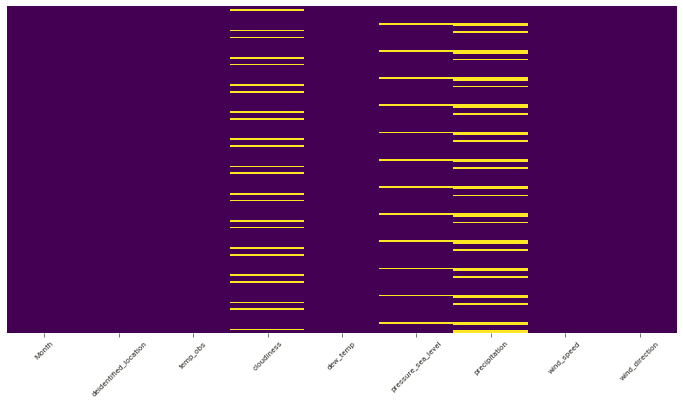

In [608]:
# Nulls Count plot of the new dataset
eda.fn_nulls_plot(df_weather)

<div class="alert alert-info">
<h4><strong><i>From the above plot, cloudiness, precipitation and pressure-sea-level has Nulls</i></strong></h4>
</div>

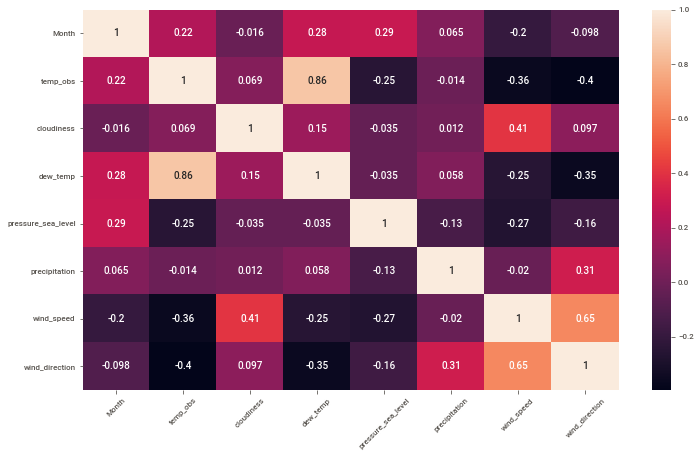

In [609]:
# Plot the correlation
eda.fn_plot_correlation(df_weather)

<div class="alert alert-info">
<h4><strong><i>From the above correlation plot, it appears that temp_obs and dew_temp has positive high correlation. Also
    wind_speed and wind_direction has some kind of correlation</i></strong></h4>
</div>

In [610]:
df_weather.head()

,Month,deidentified_location,temp_obs,cloudiness,dew_temp,pressure_sea_level,precipitation,wind_speed,wind_direction
0,1,location 1784,-2.833917,0.806540,-5.797174,1022.234306,0.638327,2.292463,161.831750
1,1,location 2532,-7.868414,2.849693,-11.459005,1017.842156,-0.032345,4.006317,215.362517
2,1,location 4525,-6.772157,NaN,-9.409489,1013.177372,3.896104,3.517784,198.349854
3,1,location 5150,-3.407251,0.926316,-7.855136,1013.955672,-0.098214,4.460968,207.657935
4,1,location 5290,1.625000,3.359918,-5.664247,1018.093535,0.780619,4.234812,214.021592


In [611]:
# Dropping the columns due to high collinearity
df_weather.drop(['temp_obs','wind_direction'], axis=1, inplace=True)

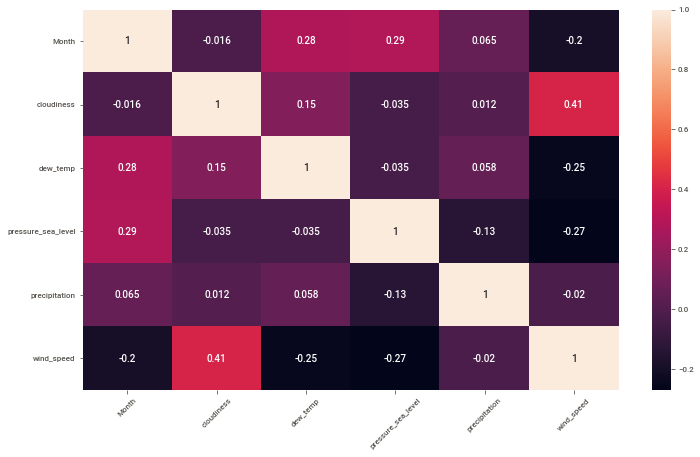

In [612]:
# Plot Correlation
eda.fn_plot_correlation(df_weather)

<div class="alert alert-info">
<h4><strong><i>After removing the high correlated features, correlation plot looks good</i></strong></h4>
</div>

In [613]:
# Filling the null values
df_weather['precipitation'].fillna(df_weather['precipitation'].mean(), inplace = True)
df_weather['pressure_sea_level'].fillna(df_weather['pressure_sea_level'].mean(), inplace = True)
df_weather['cloudiness'].fillna(df_weather['cloudiness'].mean(), inplace = True)

In [614]:
eda.fn_nulls_count(df_weather)

,nulls_count,nulls_percentage
Month,0,0.0
deidentified_location,0,0.0
cloudiness,0,0.0
dew_temp,0,0.0
pressure_sea_level,0,0.0
precipitation,0,0.0
wind_speed,0,0.0


In [615]:
df_weather.head()

,Month,deidentified_location,cloudiness,dew_temp,pressure_sea_level,precipitation,wind_speed
0,1,location 1784,0.806540,-5.797174,1022.234306,0.638327,2.292463
1,1,location 2532,2.849693,-11.459005,1017.842156,-0.032345,4.006317
2,1,location 4525,1.884708,-9.409489,1013.177372,3.896104,3.517784
3,1,location 5150,0.926316,-7.855136,1013.955672,-0.098214,4.460968
4,1,location 5290,3.359918,-5.664247,1018.093535,0.780619,4.234812


<div class="alert alert-warning">
<h4><strong>Analysis of Weather Dataset through plots</strong></h4>
</div>

In [616]:
fig = px.box(df_weather, y="cloudiness", x="deidentified_location", title="Distribution of Cloudiness across each Location")
fig.update_yaxes(title='Cloudiness')
fig.update_xaxes(title='Location')
fig.show()

<div class="alert alert-info">
<h4><strong><i>Above plot shows, Location 7048, 7369, 5290, 5677 and 2532 has a higher distribution of cloudiness</i></strong></h4>
</div>

In [617]:
fig = px.box(df_weather, y="wind_speed", x="deidentified_location", title="Distribution of Windspeed across each Location")
fig.update_yaxes(title='Windspeed')
fig.update_xaxes(title='Location')
fig.show()

<div class="alert alert-info">
<h4><strong><i>Doesnt give much information, although shows Location 7048 has some outliers. Also a high distribution along with Location 6364</i></strong></h4>
</div>

In [618]:
fig = px.box(df_weather, y="precipitation", x="deidentified_location", title="Distribution of Precipitation across each Location")
fig.update_yaxes(title='Precipitation')
fig.update_xaxes(title='Location')
fig.show()

<div class="alert alert-info">
<h4><strong><i>Above plot shows, Location 868 and Location 4525 has very high distribution of precipitation</i></strong></h4>
</div>

In [619]:
fig = px.box(df_weather, y="dew_temp", x="deidentified_location", title="Distribution of Dew Temperature across each Location")
fig.update_yaxes(title='Dew Temperature')
fig.update_xaxes(title='Location')

fig.show()

In [620]:
fig = px.box(df_weather, y="pressure_sea_level", x="deidentified_location", title="Distribution of Pressure Sea Level across each Location")
fig.update_yaxes(title='Pressure Sea Level')
fig.update_xaxes(title='Location')

fig.show()

<div class="alert alert-info">
<h4><strong><i>Shows some outliers on Location 7048</i></strong></h4>
</div>

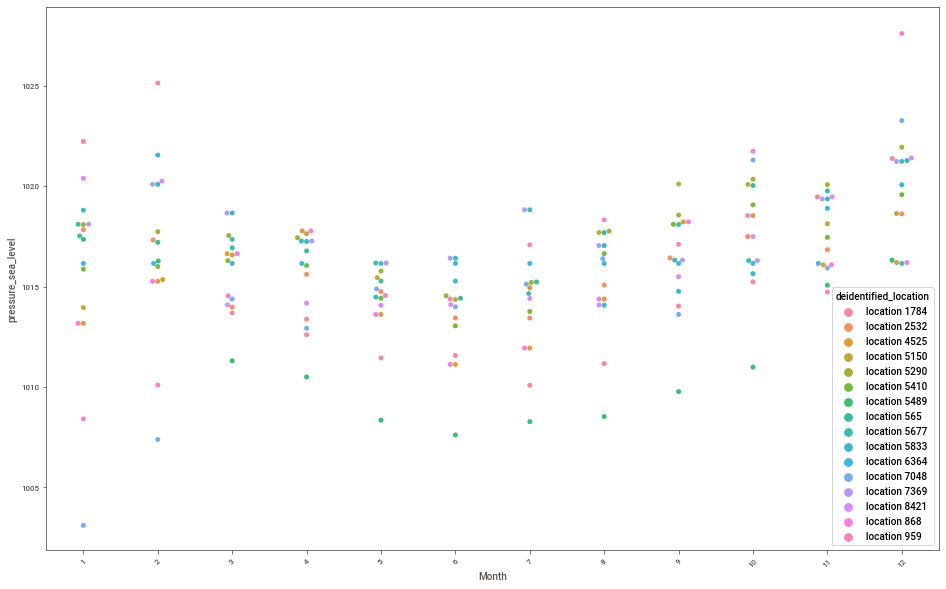

In [621]:
plt.figure(figsize = (16,10))
sns.swarmplot(x="Month", y="pressure_sea_level", hue="deidentified_location", data=df_weather)
plt.xticks(rotation=45)
plt.show()

In [622]:
# Bringing all the weather related data to the same scale
num_cols = eda.fn_fetch_col_based_ontype(df_weather, 'float64')
num_cols
se = StandardScaler()
tmp = pd.DataFrame(se.fit_transform(df_weather[num_cols]), columns= num_cols)
tmp['location'] = df_weather['deidentified_location']

In [623]:
tmp.head()

,cloudiness,dew_temp,pressure_sea_level,precipitation,wind_speed,location
0,-6.948378e-01,-1.529071,1.854118,-0.451871,-1.283879,location 1784
1,6.218957e-01,-2.191355,0.513698,-0.571553,0.449086,location 2532
2,1.430992e-16,-1.951616,-0.909927,0.129480,-0.044894,location 4525
3,-6.176466e-01,-1.769798,-0.672401,-0.583307,0.908807,location 5150
4,9.507159e-01,-1.513522,0.590415,-0.426479,0.680129,location 5290


In [624]:
fig = px.scatter(tmp, y="wind_speed", x="dew_temp", title="Relation between Dew Temp and Wind Speed")
fig.update_yaxes(title='Wind Speed')
fig.update_xaxes(title='Dew Temperature')

fig.show()

<div class="alert alert-info">
<h4><strong><i>Doesnt give much information. Some high wind-speeds at moderate dew-temperatures</i></strong></h4>
</div>

In [625]:
fig = px.scatter(tmp, y="wind_speed", x="precipitation", title="Relation between Precipitation and Wind Speed")
fig.update_yaxes(title='Wind Speed')
fig.update_xaxes(title='Precipitation')

fig.show()

<div class="alert alert-info">
<h4><strong><i>Above plot shows, when precipitation is none, or very minimal, windspeed is more. As the precipitation increases
windspeed diminishes</i></strong></h4>
</div>

In [626]:
fig = px.scatter(tmp, y="wind_speed", x="cloudiness", title="Relation between Cloudiness and Wind Speed")
fig.update_yaxes(title='Wind Speed')
fig.update_xaxes(title='Cloudiness')

fig.show()

<div class="alert alert-info">
<h4><strong><i>As the cloudiness increases, windspeed slowly increases</i></strong></h4>
</div>

In [627]:
fig = px.scatter(tmp, y="wind_speed", x="pressure_sea_level", title="Relation between Pressure Sea Level and Wind Speed")
fig.update_yaxes(title='Wind Speed')
fig.update_xaxes(title='Pressure Sea Level')

fig.show()

In [628]:
#tmp = df_weather.groupby(['deidentified_location','Month']).agg({'cloudiness':'mean'}).reset_index()
fig = px.bar(df_weather, y="cloudiness", x="Month", title="Which month has high cloudiness across locations?", barmode="group", color='deidentified_location')
fig.update_yaxes(title='Cloudiness')
fig.update_xaxes(title='Month')
fig.show()

In [629]:
fig = px.bar(df_weather, y="precipitation", x="Month", title="Which month has high Precipation?", barmode="group", color='deidentified_location')
fig.update_yaxes(title='Precipitation')
fig.update_xaxes(title='Month')
fig.show()

In [630]:
fig = px.bar(df_weather, y="wind_speed", x="Month", title="Which month has high Wind Speed?")
fig.update_yaxes(title='Wind Speed')
fig.update_xaxes(title='Month')
fig.show()

In [631]:
tmp.head()
tmp['Month'] = df_weather['Month']

In [632]:
# Compute the outliers
eda.fn_compute_outliers(df_weather)

(159, 7)


,Month,deidentified_location,cloudiness,dew_temp,pressure_sea_level,precipitation,wind_speed
0,1,location 1784,0.806540,-5.797174,1022.234306,0.638327,2.292463
1,1,location 2532,2.849693,-11.459005,1017.842156,-0.032345,4.006317
2,1,location 4525,1.884708,-9.409489,1013.177372,3.896104,3.517784
3,1,location 5150,0.926316,-7.855136,1013.955672,-0.098214,4.460968
4,1,location 5290,3.359918,-5.664247,1018.093535,0.780619,4.234812
5,1,location 5410,0.760563,-7.467026,1015.872727,0.471063,3.421265
6,1,location 5489,2.144000,0.356855,1017.359085,0.362162,2.287903
7,1,location 565,0.730983,-7.206999,1017.530759,0.593540,2.428129
8,1,location 5677,3.667774,9.211336,1018.112466,1.796770,3.642876
9,1,location 5833,2.487500,7.588425,1018.809472,0.595136,3.252355


In [633]:
# Cleaned data frame with outliers removed
df_weather_cleaned = eda.fn_compute_outliers(df_weather)

(159, 7)


In [634]:
# Cleaned modified weather data shape
df_weather_cleaned.shape

(159, 7)

(159, 5)


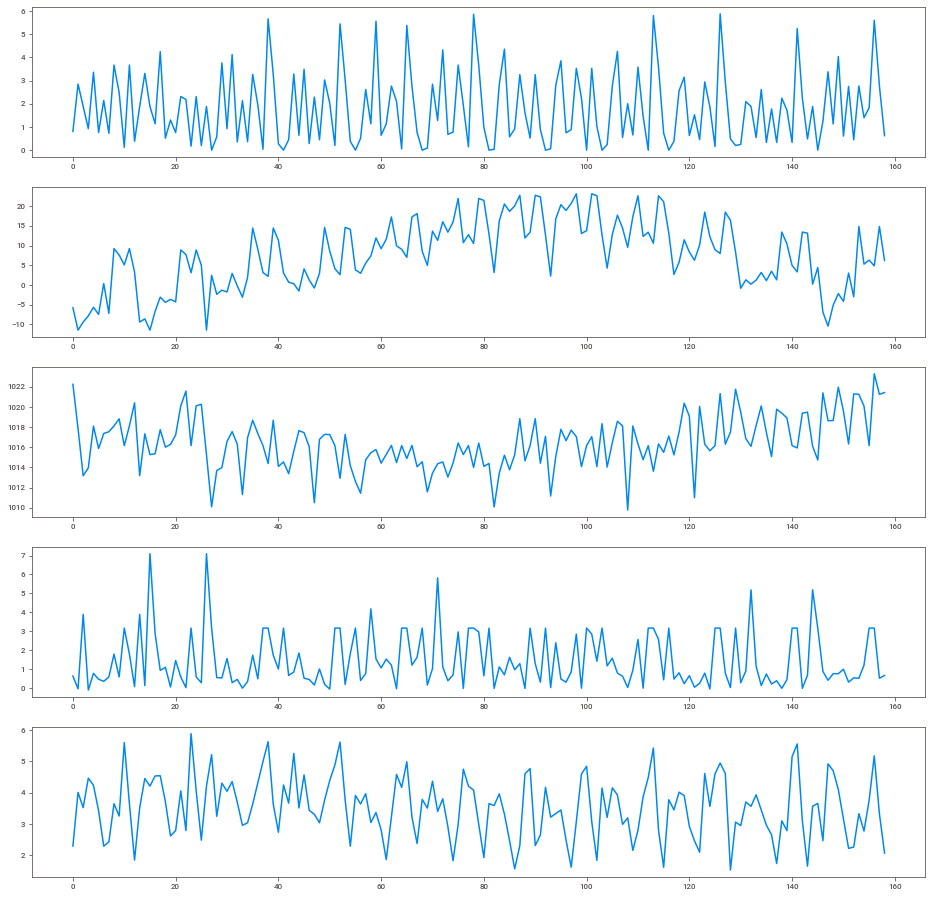

In [635]:
# Plotting the residuals after removal of outliers
eda.fn_plot_residuals(df_weather_cleaned[num_cols])

In [636]:
df_weather_cleaned.shape

(159, 7)

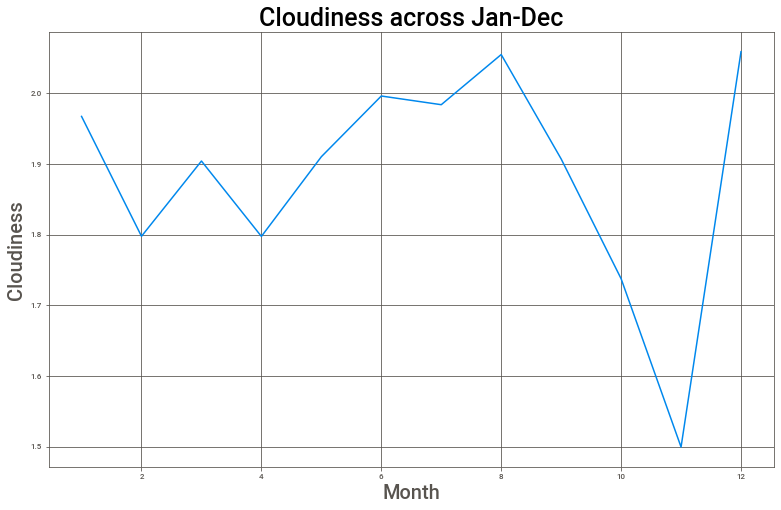

In [637]:
df_weather.groupby("Month")['cloudiness'].mean().plot(figsize=(13,8));
plt.xlabel('Month',fontsize=20)
plt.ylabel('Cloudiness',fontsize=20)
plt.title('Cloudiness across Jan-Dec',fontsize=25)
#ax.tick_params(labelsize=15)
plt.grid()
plt.show()



<div class="alert alert-info">
<h4><strong><i>Cloudiness is more June-August and then decreases abruptly in November and increases in Dec again</i></strong></h4>
</div>

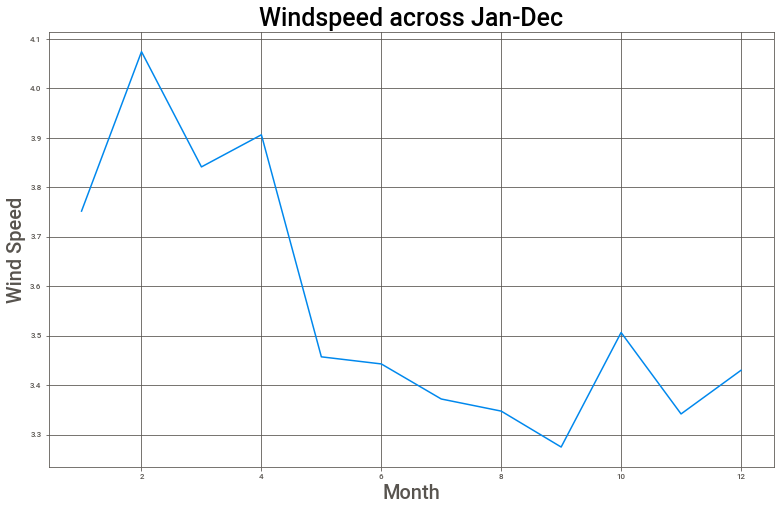

In [638]:
df_weather.groupby("Month")['wind_speed'].mean().plot(figsize=(13,8));
plt.xlabel('Month',fontsize=20)
plt.ylabel('Wind Speed',fontsize=20)
plt.title('Windspeed across Jan-Dec',fontsize=25)
#ax.tick_params(labelsize=15)
plt.grid()
plt.show()

<div class="alert alert-info">
<h4><strong><i>Windspeed is more in Feb-April and decreases after that</i></strong></h4>
</div>

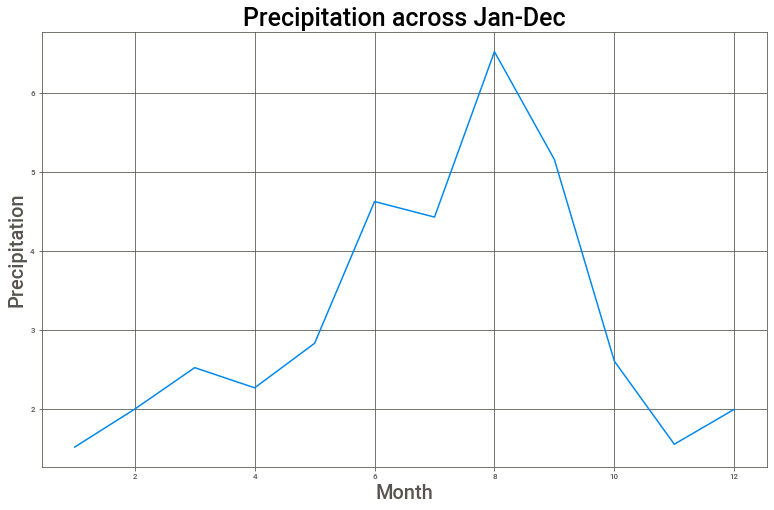

In [639]:
df_weather.groupby("Month")['precipitation'].mean().plot(figsize=(13,8));
plt.xlabel('Month',fontsize=20)
plt.ylabel('Precipitation',fontsize=20)
plt.title('Precipitation across Jan-Dec',fontsize=25)
#ax.tick_params(labelsize=15)
plt.grid()
plt.show()

<div class="alert alert-info">
<h4><strong><i>Precipitation inceases and is high in the month of June/July August and decreases after that</i></strong></h4>
</div>

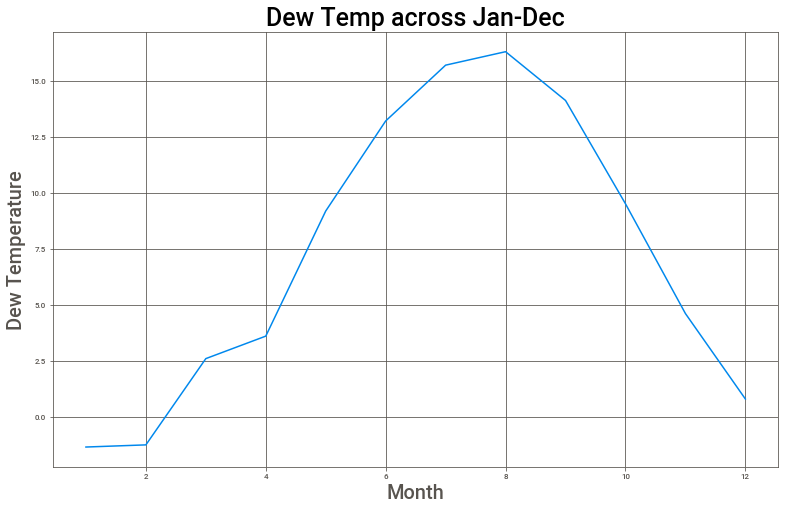

In [640]:
df_weather.groupby("Month")['dew_temp'].mean().plot(figsize=(13,8));
plt.xlabel('Month',fontsize=20)
plt.ylabel('Dew Temperature',fontsize=20)
plt.title('Dew Temp across Jan-Dec',fontsize=25)
#ax.tick_params(labelsize=15)
plt.grid()
plt.show()

<div class="alert alert-info">
<h4><strong><i>Dew Temperature very low in Jan, is high in June and reaches its peak in August and decreases after that</i></strong></h4>
</div>

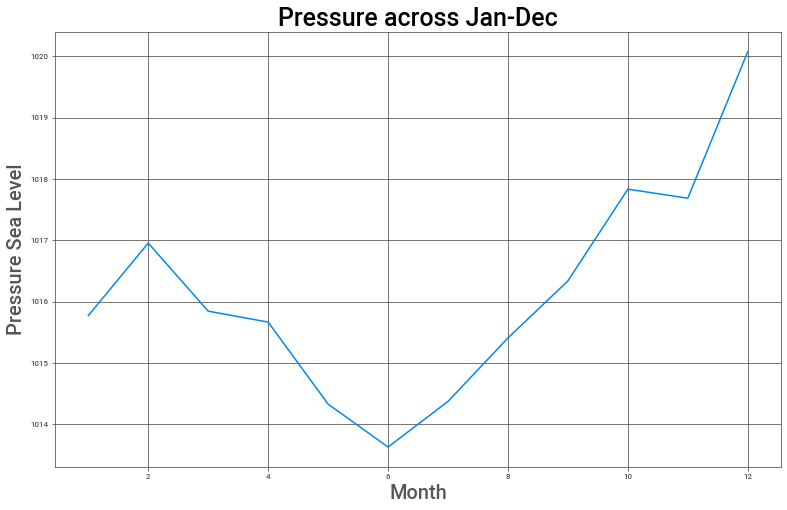

In [641]:
df_weather.groupby("Month")['pressure_sea_level'].mean().plot(figsize=(13,8));
plt.xlabel('Month',fontsize=20)
plt.ylabel('Pressure Sea Level',fontsize=20)
plt.title('Pressure across Jan-Dec',fontsize=25)
#ax.tick_params(labelsize=15)
plt.grid()
plt.show()

<div class="alert alert-danger">
<h3><strong>Merge Datasets</strong></h3>
</div>

In [642]:
# Merge the farm data with the modfied weather data on location
df_farm = pd.merge(farm_data, df_weather,on='deidentified_location')

In [643]:
# Check first few rows
df_farm.head()

,farm_id,farm_area,farming_company,deidentified_location,Month,cloudiness,dew_temp,pressure_sea_level,precipitation,wind_speed
0,fid_110884,690.455096,Obery Farms,location 7369,1,3.667774,9.211336,1018.112466,1.796770,3.642876
1,fid_110884,690.455096,Obery Farms,location 7369,2,2.312073,8.870546,1020.102457,0.593391,4.054741
2,fid_110884,690.455096,Obery Farms,location 7369,3,3.266272,14.429973,1018.672666,1.740591,3.633602
3,fid_110884,690.455096,Obery Farms,location 7369,4,3.026906,14.591806,1017.275145,0.197222,3.759306
4,fid_110884,690.455096,Obery Farms,location 7369,5,2.764957,17.237097,1016.178997,1.215054,3.219758


In [644]:
# Check the shape of dataframe
df_farm.shape

(17388, 10)

In [645]:
# Verify the duplicated rows
df_farm[df_farm.duplicated()]

,farm_id,farm_area,farming_company,deidentified_location,Month,cloudiness,dew_temp,pressure_sea_level,precipitation,wind_speed


In [646]:
df_farm.shape

(17388, 10)

In [647]:
# Check no of nulls
eda.fn_nulls_count(df_farm)

,nulls_count,nulls_percentage
farm_id,0,0.0
farm_area,0,0.0
farming_company,0,0.0
deidentified_location,0,0.0
Month,0,0.0
cloudiness,0,0.0
dew_temp,0,0.0
pressure_sea_level,0,0.0
precipitation,0,0.0
wind_speed,0,0.0


In [648]:
# Check the data types
df_farm.dtypes

farm_id                   object
farm_area                float64
farming_company           object
deidentified_location     object
Month                      int64
cloudiness               float64
dew_temp                 float64
pressure_sea_level       float64
precipitation            float64
wind_speed               float64
dtype: object

In [649]:
#df_farm.groupby(['farm_id','Month']).head()

In [650]:
# Check the unique values
df_farm.nunique()

farm_id                  1434
farm_area                1397
farming_company            16
deidentified_location      16
Month                      12
cloudiness                146
dew_temp                  168
pressure_sea_level        157
precipitation             130
wind_speed                168
dtype: int64

In [651]:
data.head()

,date,farm_id,ingredient_type
0,2016-01-01,fid_110884,ing_w
1,2016-01-01,fid_90053,ing_w
2,2016-01-01,fid_17537,ing_w
3,2016-01-01,fid_110392,ing_w
4,2016-01-01,fid_62402,ing_w


In [652]:
df_farm.shape

(17388, 10)

In [653]:
#data[data.farm_id=='fid_110884'].date_part.dt.month

In [654]:
# Checking unique values with respect to a particular Farm
data[data.farm_id == 'fid_110884'].nunique()

date               8784
farm_id               1
ingredient_type       1
dtype: int64

In [655]:
# Shape of train data
data.shape

(20216100, 3)

In [656]:
# Data Types of train data
data.dtypes

date               datetime64[ns]
farm_id                    object
ingredient_type            object
dtype: object

In [657]:
#Converting to Monthly Data
data['Month'] = data['date'].dt.month

In [658]:
data.head()

,date,farm_id,ingredient_type,Month
0,2016-01-01,fid_110884,ing_w,1
1,2016-01-01,fid_90053,ing_w,1
2,2016-01-01,fid_17537,ing_w,1
3,2016-01-01,fid_110392,ing_w,1
4,2016-01-01,fid_62402,ing_w,1


In [659]:
# Checking the unique values
data.nunique()

date               8784
farm_id            1434
ingredient_type       4
Month                12
dtype: int64

In [660]:
# Removing the date as date has been converted to month format
data.drop(['date'], axis=1, inplace=True)

In [661]:
data[data.Month == 1].nunique()

farm_id            1416
ingredient_type       4
Month                 1
dtype: int64

In [662]:
# Drop duplicates and reset the index
df_mod = data.drop_duplicates(keep='first')
df_mod.reset_index(inplace=True)

In [663]:
df_mod.head()

,index,farm_id,ingredient_type,Month
0,0,fid_110884,ing_w,1
1,1,fid_90053,ing_w,1
2,2,fid_17537,ing_w,1
3,3,fid_110392,ing_w,1
4,4,fid_62402,ing_w,1


In [664]:
# Check the modified dataframe shape
df_mod.shape

(28133, 4)

In [665]:
df_farm.shape

(17388, 10)

In [666]:
# Check the last few rows in the modified data frame
df_mod.tail()

,index,farm_id,ingredient_type,Month
28128,18746560,fid_64862,ing_w,12
28129,18746561,fid_67825,ing_w,12
28130,18780284,fid_22080,ing_x,12
28131,18800251,fid_31715,ing_w,12
28132,19085659,fid_19864,ing_w,12


In [667]:
df_mod.drop('index', inplace=True, axis=1)

C:\Users\ajana\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [668]:
# Check the number of duplicate rows
df_mod[df_mod.duplicated()]

,farm_id,ingredient_type,Month


In [669]:
df_mod.shape

(28133, 3)

In [670]:
df_mod[df_mod.farm_id == 'fid_110884'].nunique()

farm_id             1
ingredient_type     1
Month              12
dtype: int64

In [671]:
df_mod.columns

Index(['farm_id', 'ingredient_type', 'Month'], dtype='object')

In [672]:
df_mod.columns = ['farm_id','ingredient_type','Month']

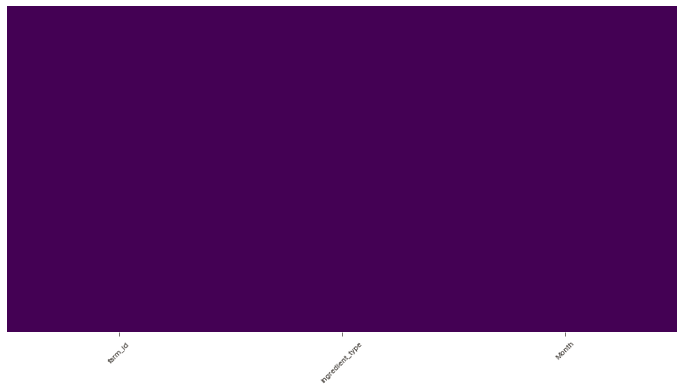

In [673]:
# Plotting the nulls count
eda.fn_nulls_plot(df_mod)

In [674]:
# Merging the two modified data frames
df_final = pd.merge(df_mod, df_farm, on=['farm_id','Month'])

In [675]:
# Checking final dataframe shape
df_final.shape

(28481, 11)

In [676]:
# First few rows of the final dataframe
df_final.head()

,farm_id,ingredient_type,Month,farm_area,farming_company,deidentified_location,cloudiness,dew_temp,pressure_sea_level,precipitation,wind_speed
0,fid_110884,ing_w,1,690.455096,Obery Farms,location 7369,3.667774,9.211336,1018.112466,1.79677,3.642876
1,fid_90053,ing_w,1,252.696160,Obery Farms,location 7369,3.667774,9.211336,1018.112466,1.79677,3.642876
2,fid_17537,ing_w,1,499.446528,Obery Farms,location 7369,3.667774,9.211336,1018.112466,1.79677,3.642876
3,fid_110392,ing_w,1,2200.407555,Obery Farms,location 7369,3.667774,9.211336,1018.112466,1.79677,3.642876
4,fid_62402,ing_w,1,10833.140121,Obery Farms,location 7369,3.667774,9.211336,1018.112466,1.79677,3.642876


In [677]:
# Last few rows of the final dataframe
df_final.tail()

,farm_id,ingredient_type,Month,farm_area,farming_company,deidentified_location,cloudiness,dew_temp,pressure_sea_level,precipitation,wind_speed
28476,fid_53336,ing_w,12,142.699008,Sanderson Farms,location 5677,2.770065,14.835081,1021.243148,0.522849,3.326613
28477,fid_64862,ing_w,12,336.959181,Del Monte Foods,location 5677,2.770065,14.835081,1021.243148,0.522849,3.326613
28478,fid_67825,ing_w,12,3729.312226,Wayne Farms,location 5677,2.770065,14.835081,1021.243148,0.522849,3.326613
28479,fid_31715,ing_w,12,48.309560,Sanderson Farms,location 5677,2.770065,14.835081,1021.243148,0.522849,3.326613
28480,fid_19864,ing_w,12,4598.698500,Obery Farms,location 5290,4.033175,-2.197308,1021.949183,0.766532,4.097039


In [678]:
df_final.shape

(28481, 11)

In [679]:
df_final.describe()

,Month,farm_area,cloudiness,dew_temp,pressure_sea_level,precipitation,wind_speed
count,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000
mean,6.515712,9929.236359,1.842357,7.546334,1016.110013,1.709387,3.393842
std,3.448565,10795.487749,1.382138,8.841061,3.122275,3.385872,0.921925
min,1.000000,26.291549,0.000000,-11.459005,1003.108016,-0.098214,1.529364
25%,4.000000,2957.009587,0.631579,1.227738,1014.413425,0.315860,2.772043
50%,7.000000,6698.492106,1.620619,7.714943,1016.280316,0.763636,3.362366
75%,10.000000,12802.590818,2.830700,14.404444,1018.093535,1.584722,4.014113
max,12.000000,81290.125000,6.133423,23.107796,1027.612231,31.418605,6.930321


In [680]:
df_final.columns.tolist()

['farm_id',
 'ingredient_type',
 'Month',
 'farm_area',
 'farming_company',
 'deidentified_location',
 'cloudiness',
 'dew_temp',
 'pressure_sea_level',
 'precipitation',
 'wind_speed']

In [681]:
 # Datatypes of the final dataframe
df_final.dtypes

farm_id                   object
ingredient_type           object
Month                      int64
farm_area                float64
farming_company           object
deidentified_location     object
cloudiness               float64
dew_temp                 float64
pressure_sea_level       float64
precipitation            float64
wind_speed               float64
dtype: object

In [682]:
# Convert the columns to categorical
cols_convert = ['farm_id','ingredient_type','Month', 'deidentified_location']
df_final[cols_convert] = df_final[cols_convert].astype("category")

In [683]:
df_final.dtypes

farm_id                  category
ingredient_type          category
Month                    category
farm_area                 float64
farming_company            object
deidentified_location    category
cloudiness                float64
dew_temp                  float64
pressure_sea_level        float64
precipitation             float64
wind_speed                float64
dtype: object

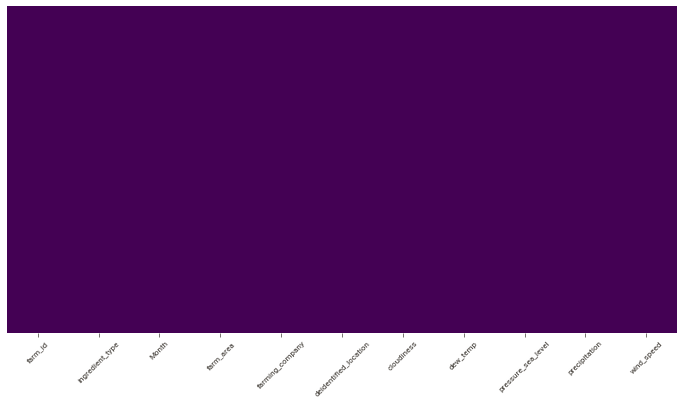

In [684]:
eda.fn_nulls_plot(df_final)

In [685]:
# Check nulls count of the final dataframe
eda.fn_nulls_count(df_final)

,nulls_count,nulls_percentage
farm_id,0,0.0
ingredient_type,0,0.0
Month,0,0.0
farm_area,0,0.0
farming_company,0,0.0
deidentified_location,0,0.0
cloudiness,0,0.0
dew_temp,0,0.0
pressure_sea_level,0,0.0
precipitation,0,0.0


In [686]:
df_final.describe()

,farm_area,cloudiness,dew_temp,pressure_sea_level,precipitation,wind_speed
count,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000
mean,9929.236359,1.842357,7.546334,1016.110013,1.709387,3.393842
std,10795.487749,1.382138,8.841061,3.122275,3.385872,0.921925
min,26.291549,0.000000,-11.459005,1003.108016,-0.098214,1.529364
25%,2957.009587,0.631579,1.227738,1014.413425,0.315860,2.772043
50%,6698.492106,1.620619,7.714943,1016.280316,0.763636,3.362366
75%,12802.590818,2.830700,14.404444,1018.093535,1.584722,4.014113
max,81290.125000,6.133423,23.107796,1027.612231,31.418605,6.930321


In [687]:
# Export to CSV
df_final.to_csv('mergedData.csv') 


In [688]:
df_final.head()

,farm_id,ingredient_type,Month,farm_area,farming_company,deidentified_location,cloudiness,dew_temp,pressure_sea_level,precipitation,wind_speed
0,fid_110884,ing_w,1,690.455096,Obery Farms,location 7369,3.667774,9.211336,1018.112466,1.79677,3.642876
1,fid_90053,ing_w,1,252.696160,Obery Farms,location 7369,3.667774,9.211336,1018.112466,1.79677,3.642876
2,fid_17537,ing_w,1,499.446528,Obery Farms,location 7369,3.667774,9.211336,1018.112466,1.79677,3.642876
3,fid_110392,ing_w,1,2200.407555,Obery Farms,location 7369,3.667774,9.211336,1018.112466,1.79677,3.642876
4,fid_62402,ing_w,1,10833.140121,Obery Farms,location 7369,3.667774,9.211336,1018.112466,1.79677,3.642876


In [689]:
df_final[df_final.farm_id == 'fid_110884']

,farm_id,ingredient_type,Month,farm_area,farming_company,deidentified_location,cloudiness,dew_temp,pressure_sea_level,precipitation,wind_speed
0,fid_110884,ing_w,1,690.455096,Obery Farms,location 7369,3.667774,9.211336,1018.112466,1.796770,3.642876
2332,fid_110884,ing_w,2,690.455096,Obery Farms,location 7369,2.312073,8.870546,1020.102457,0.593391,4.054741
4699,fid_110884,ing_w,3,690.455096,Obery Farms,location 7369,3.266272,14.429973,1018.672666,1.740591,3.633602
7068,fid_110884,ing_w,4,690.455096,Obery Farms,location 7369,3.026906,14.591806,1017.275145,0.197222,3.759306
9440,fid_110884,ing_w,5,690.455096,Obery Farms,location 7369,2.764957,17.237097,1016.178997,1.215054,3.219758
11816,fid_110884,ing_w,6,690.455096,Obery Farms,location 7369,3.668421,21.935556,1016.419161,2.969444,2.989306
14191,fid_110884,ing_w,7,690.455096,Obery Farms,location 7369,3.256303,22.730108,1018.831132,1.297043,2.309543
16567,fid_110884,ing_w,8,690.455096,Obery Farms,location 7369,3.529412,23.107796,1017.050202,2.856183,3.073790
18947,fid_110884,ing_w,9,690.455096,Obery Farms,location 7369,3.578667,22.607083,1016.325630,2.570833,2.799306
21331,fid_110884,ing_w,10,690.455096,Obery Farms,location 7369,2.942643,18.473790,1016.299323,0.794355,4.609812


In [690]:
# Fetching the categorical columns
cat_cols = eda.fn_fetch_col_based_ontype(df_final,'category','object')

In [691]:
cat_cols

['farm_id',
 'ingredient_type',
 'Month',
 'farming_company',
 'deidentified_location']

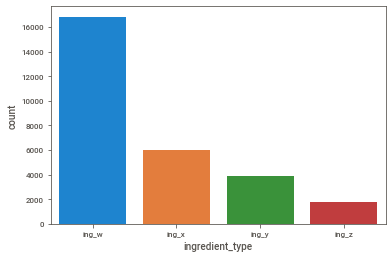

In [692]:
sns.countplot(x='ingredient_type', data=df_final)



<div class="alert alert-info">
<h4><strong><i>'ing_w' has the highest count and 'ing_z' has the lowest</i></strong></h4>
</div>

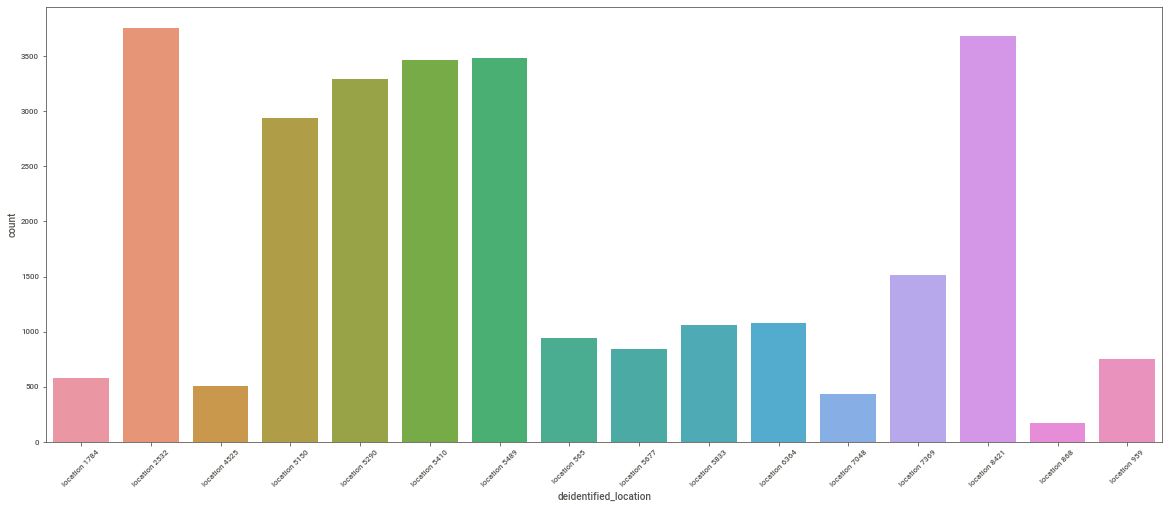

In [693]:
plt.figure(figsize = (20,8))
sns.countplot(x='deidentified_location', data=df_final)
plt.xticks(rotation=45)
plt.show()

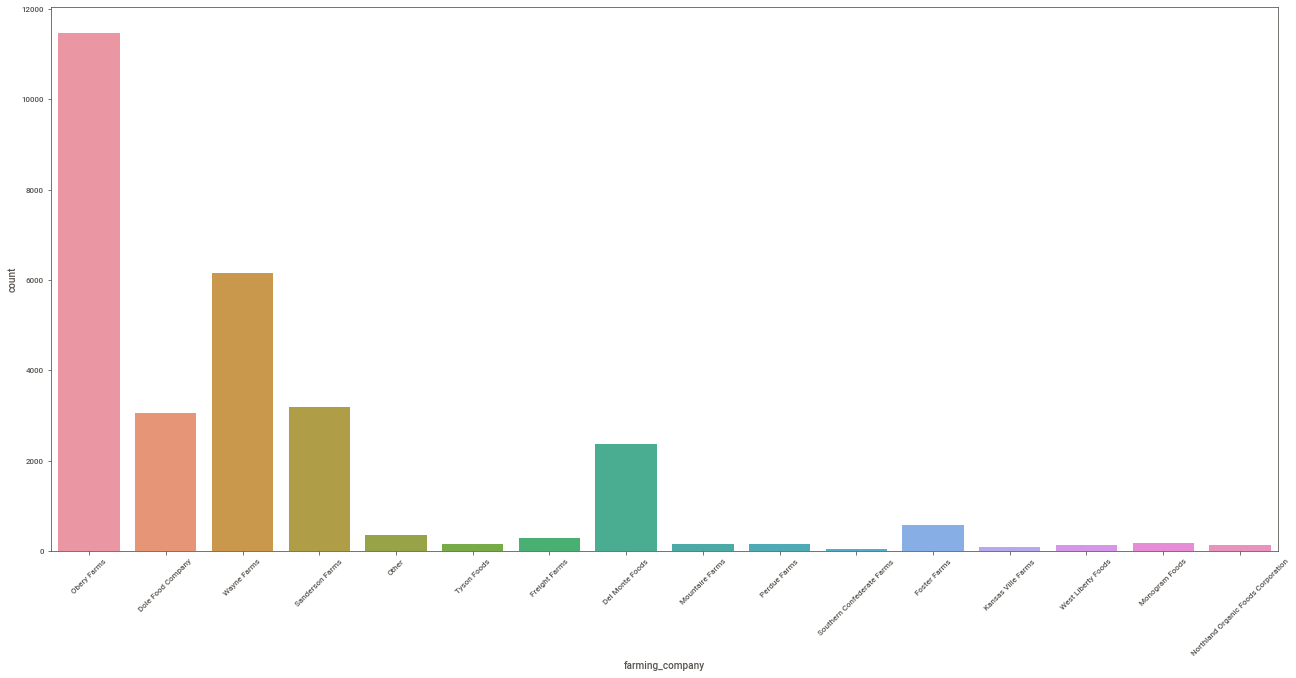

In [694]:
plt.figure(figsize = (22,10))
sns.countplot(x='farming_company', data=df_final)
plt.xticks(rotation=45)
plt.show()

In [695]:
df_final[df_final.farming_company == 'Obery Farms'].deidentified_location.unique()

[location 7369, location 6364, location 959, location 5489, location 2532, ..., location 8421, location 1784, location 868, location 7048, location 5410]
Length: 15
Categories (15, object): [location 7369, location 6364, location 959, location 5489, ..., location 1784, location 868, location 7048, location 5410]

In [696]:
df_final[df_final.deidentified_location == 'location 7369'].farming_company.unique()

array(['Obery Farms', 'Dole Food Company', 'Wayne Farms',
       'Sanderson Farms', 'Other', 'Tyson Foods', 'Freight Farms'],
      dtype=object)

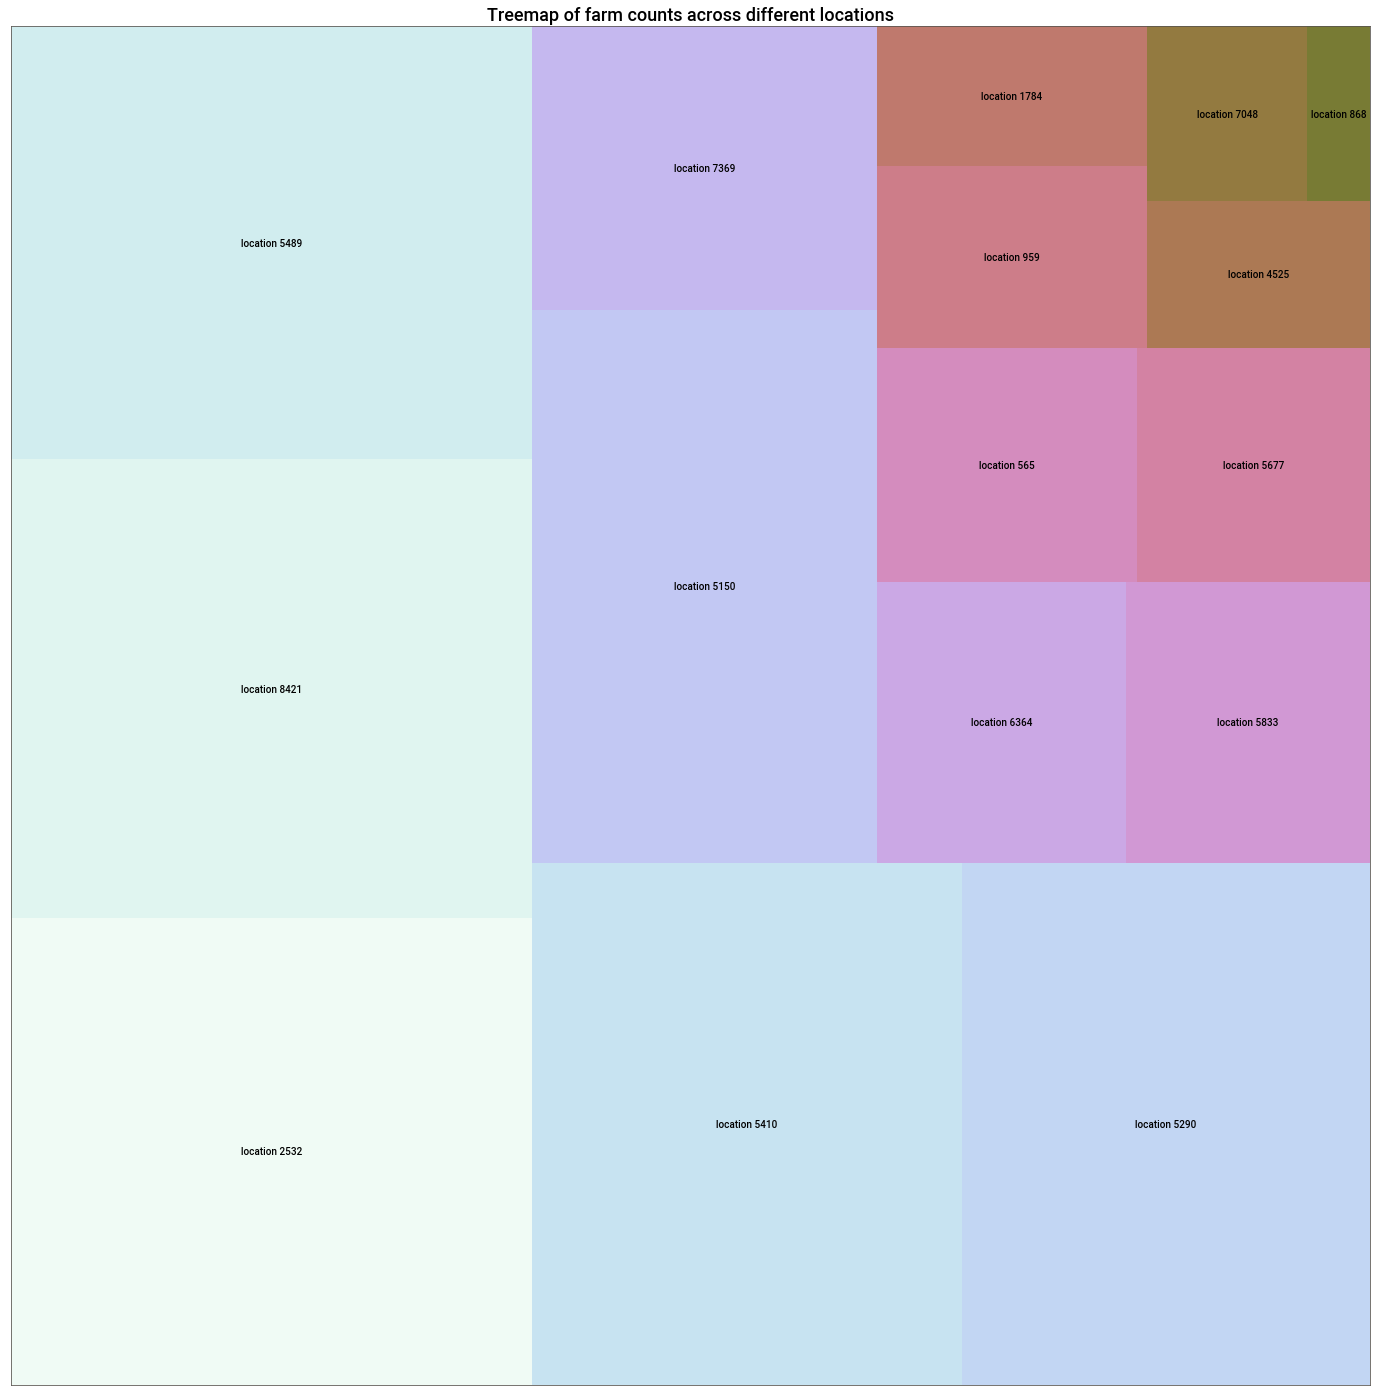

In [697]:
fig = plt.figure(figsize=(25, 21))
marrimeko=df_final.deidentified_location.value_counts().to_frame()
ax = fig.add_subplot(111, aspect="equal")
ax = squarify.plot(sizes=marrimeko['deidentified_location'].values,label=marrimeko.index,
              color=sns.color_palette('cubehelix_r', 28), alpha=1)
ax.set_xticks([])
ax.set_yticks([])
fig=plt.gcf()
fig.set_size_inches(40,25)
plt.title("Treemap of farm counts across different locations", fontsize=18)
plt.show();

In [698]:
tmp = df_final.groupby('farming_company')['farm_id'].count().reset_index()

fig = px.bar(tmp, y="farm_id", x="farming_company", text='farm_id', title="No of Farms owned by the farming companies")

fig.update_yaxes(title='Farm Count')

fig.update_xaxes(title='Farming Company')

fig.show()

<div class="alert alert-warning">
<h3><strong>Conclusion on EDA</strong></h3>
    <ul>
        <li>Location 5290 has hightest number of Farms and Location 868 has the lowest</li>
        <li>Location 5290 has the highest farm total area</li>
        <li>Cloudiness distribution is more across Locations 7048, 5290</li>
        <li>Precipitation has high distribution and is more across Locations 4525 and 868</li>
        <li>Cloudiness, Precipitation and Dew Temp is more from June-August</li>
        <li> Windspeed is more in Feb-April and decreses after that</li>
        <li>There are more number of 'ing_w' ingredient type than 'ing_x', 'ing_y' and 'ing_z'</li>
        <li>'Obey Farms' owns the highest number of farms and 'Southern Confederate Farms' owns the least
    </ul>
    
</div>